In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
def parse_losses(fn):
    gen_losses = []
    dis_losses = []
    with open(fn, "r") as f:
        i = 1
        for l in f:
            if i % 2 == 1: 
                gen_losses.append([float(i)  for i in l[:-2].split("[")[1].split(" ") if i != ""])
            else:
                dis_losses.append([float(i)  for i in l[:-2].split("[")[1].split(" ") if i != ""])
            i += 1
            
    return gen_losses, dis_losses

In [3]:
def plot_losses(gen_losses, dis_losses, title):
    gen_losses = np.array(gen_losses)
    dis_losses = np.array(dis_losses)
    assert gen_losses.shape == dis_losses.shape
    for i in range(gen_losses.shape[1]):
        plt.title(title + " layer {}".format(i+1))
        plt.scatter(np.arange(gen_losses.shape[0]), gen_losses[:,i], s=11, alpha=0.6, label="generator")
        plt.scatter(np.arange(gen_losses.shape[0]), dis_losses[:,i], s=11, alpha=0.6, label="discriminator")
        plt.legend()
        plt.ylabel("Losses")
        plt.xlabel("Epochs")
        plt.show()

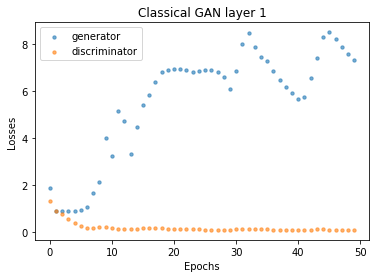

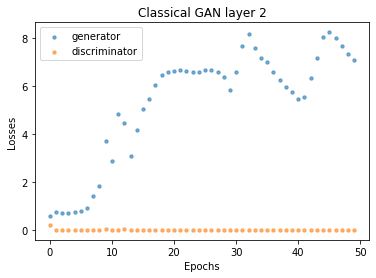

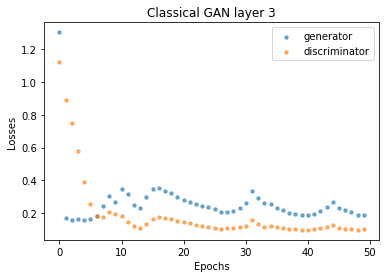

In [4]:
cla_gen_losses, cla_diss_losses = parse_losses("../results/loss_gan")

plot_losses(cla_gen_losses, cla_diss_losses, "Classical GAN")

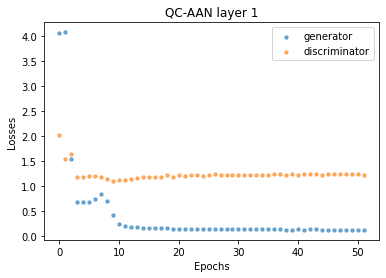

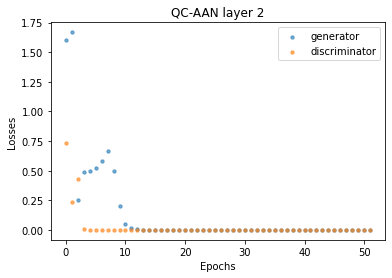

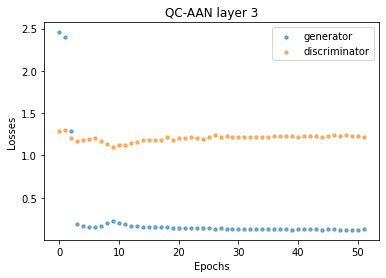

In [5]:
qc_gen_losses, qc_diss_losses = parse_losses("../results/loss_qcaan")

plot_losses(qc_gen_losses, qc_diss_losses, "QC-AAN")